# Project 1

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling

C:\Users\Arturo\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [2]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [8]:
data.sample(10)

Price  Year  Mileage State        Make         Model
218224  49493  2015    44251    OR         GMC      Yukon4WD
192888  36980  2017    11045    TX      Toyota        Tundra
73528   23518  2016      325    GA         Kia      OptimaLX
421796  19877  2014    28733    LA  Volkswagen         Jetta
394126  14622  2012    48878    NJ      Toyota      RAV4Base
134026  13480  2014    45511    CO      Toyota     CorollaLE
79369   21989  2012    76322    NC      Nissan   Frontier4WD
497384  26426  2016    10249    FL   Chevrolet   CamaroCoupe
328010  29600  2015    49129    FL   Chevrolet  ColoradoCrew
19677   14795  2015    30045    MO         Kia      OptimaLX

### 1. First exploration

1.1 Check missing values

In [3]:
missing_values = data.isnull().sum()
missing_values

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

1.2 Check numerical atributes

In [4]:
data.describe()

Price           Year       Mileage
count  500000.000000  500000.000000  5.000000e+05
mean    21144.186304    2013.197174  5.507643e+04
std     10753.259704       3.290135  4.089704e+04
min      5001.000000    1997.000000  5.000000e+00
25%     13499.000000    2012.000000  2.585500e+04
50%     18450.000000    2014.000000  4.299000e+04
75%     26998.000000    2016.000000  7.740600e+04
max     79999.000000    2018.000000  2.457832e+06

1. Check categorical values

In [10]:
cat_val = ["State", "Make", "Model"]

for col in cat_val:
    print ([col]," : ",data[col].unique())

['State']  :  [' MD' ' KY' ' SC' ' OK' ' TN' ' FL' ' NH' ' WI' ' NY' ' TX' ' NJ' ' MI'
 ' AL' ' CA' ' NC' ' GA' ' OR' ' OH' ' AR' ' VA' ' WA' ' IL' ' AZ' ' MA'
 ' CO' ' MN' ' KS' ' PA' ' MO' ' SD' ' IN' ' NE' ' UT' ' NM' ' HI' ' NV'
 ' DE' ' MS' ' ID' ' IA' ' ME' ' CT' ' MT' ' VT' ' WV' ' LA' ' ND' ' AK'
 ' RI' ' WY' ' DC']
['Make']  :  ['Nissan' 'Chevrolet' 'Hyundai' 'Jeep' 'Ford' 'Kia' 'Mercedes-Benz'
 'Dodge' 'GMC' 'Toyota' 'Honda' 'Volkswagen' 'Cadillac' 'Volvo' 'BMW'
 'Subaru' 'Chrysler' 'Buick' 'Ram' 'Lexus' 'Porsche' 'Audi' 'Lincoln'
 'MINI' 'INFINITI' 'Scion' 'Land' 'Acura' 'Mazda' 'Mercury' 'Mitsubishi'
 'Pontiac' 'Jaguar' 'Bentley' 'Suzuki' 'FIAT' 'Tesla' 'Freightliner']
['Model']  :  ['MuranoAWD' 'CamaroCoupe' 'Santa' 'Grand' 'Wrangler' 'F-1504WD'
 'ExplorerXLT' 'Sonata4dr' 'SorentoSX' 'M-ClassML350' 'JourneyFWD' 'Super'
 'Sierra' 'Silverado' 'CamryLE' 'OdysseyEX-L' 'Pathfinder4WD' 'AcadiaFWD'
 'EscapeSE' 'Express' 'F-150XLT' 'EdgeSEL' 'Passat4dr' 'EdgeSport'
 'FlexLimited' 

### 2. Data visualization

In [12]:
profile = pandas_profiling.ProfileReport(data)

In [14]:
rejected_variables = profile.get_rejected_variables(threshold=0.9)
rejected_variables

[]

In [15]:
profile.to_file(outputfile="profile_Used_vehicle.html")

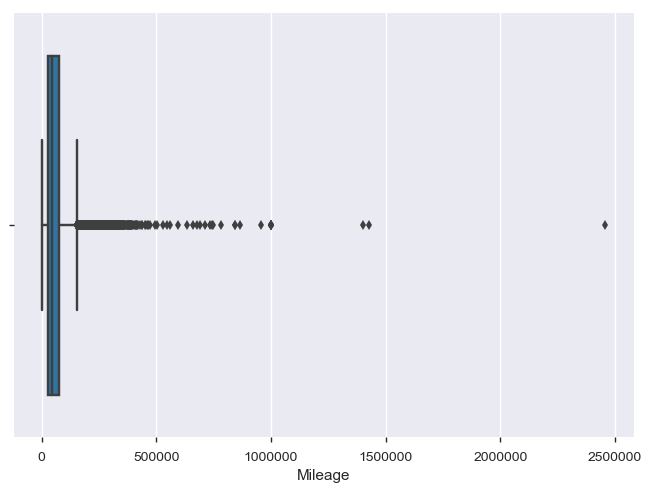

In [21]:
import seaborn as sns

sns.boxplot(x=data['Mileage'])

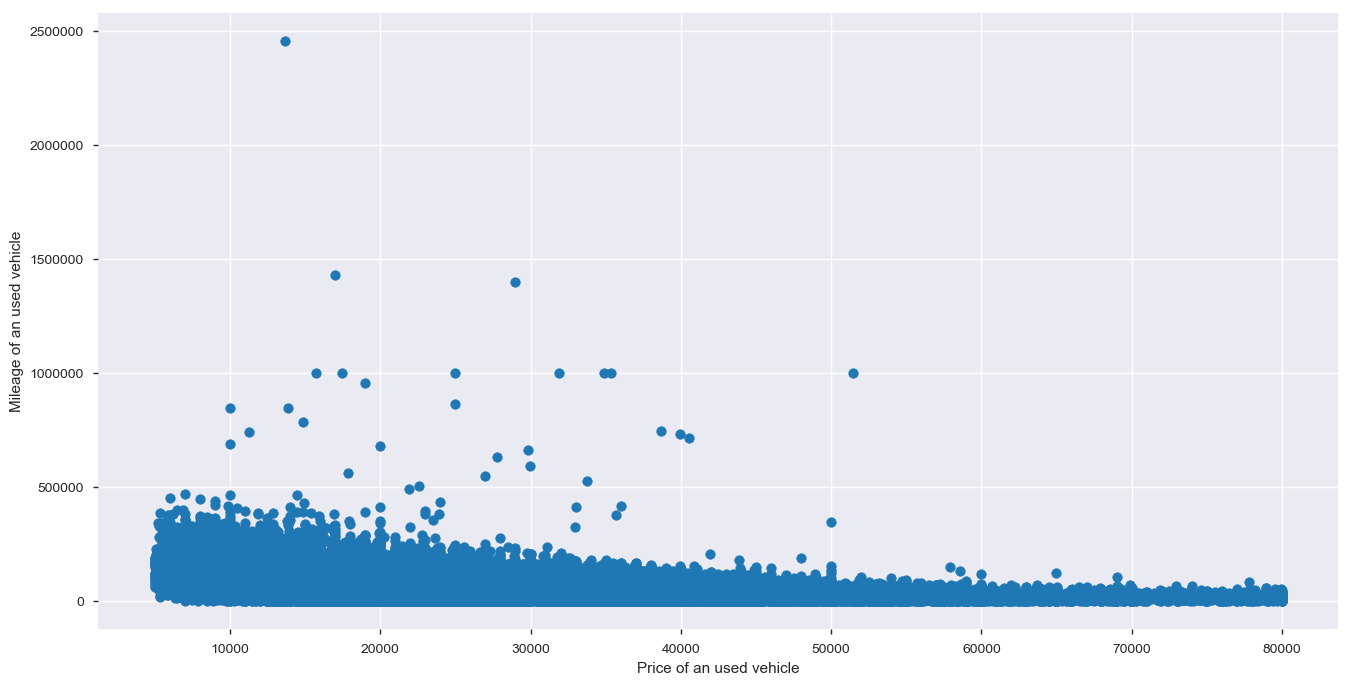

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Price'], data['Mileage'])
ax.set_xlabel('Price of an used vehicle')
ax.set_ylabel('Mileage of an used vehicle')
plt.show()

In [ ]:
print(np.where(z > 3))

In [36]:
#checking mileage - delete extreme values
q_max = data["Mileage"].quantile(0.75)
q_min = data['Mileage'].quantile(0.25)
iqr = q_max - q_min

data_clean = data[(data['Mileage']<(q_max + 1.5*iqr))&(data['Mileage']>(q_min - 1.5*iqr))]

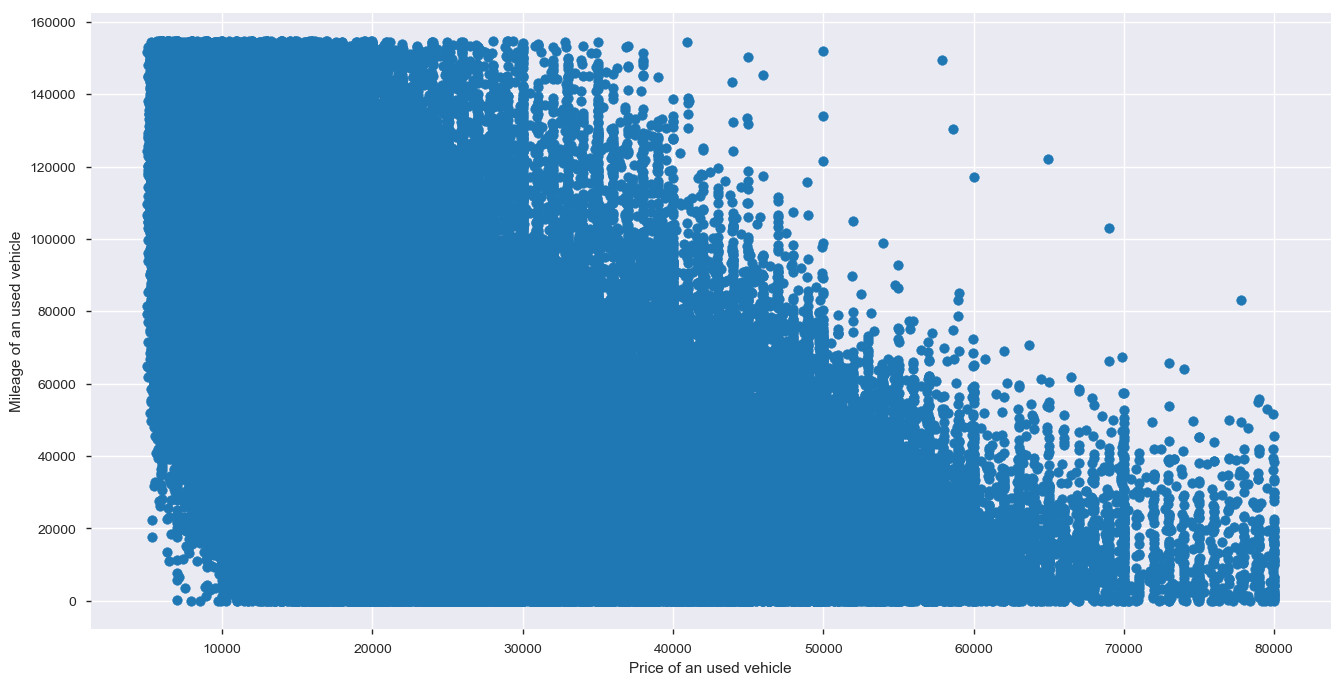

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_clean['Price'], data_clean['Mileage'])
ax.set_xlabel('Price of an used vehicle')
ax.set_ylabel('Mileage of an used vehicle')
plt.show()

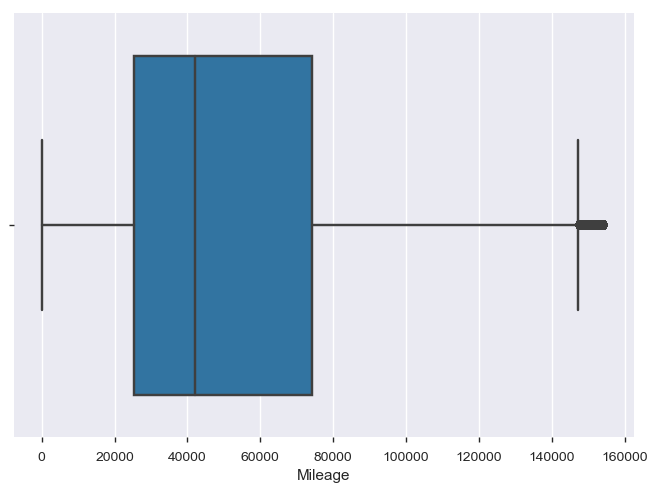

In [38]:
sns.boxplot(x=data_clean['Mileage'])

In [39]:
profile = pandas_profiling.ProfileReport(data_clean)

In [40]:
profile

In [51]:
data_clean.sample(10)

Price  Year  Mileage State        Make           Model
413112  20500  2009    55623    OH   Chevrolet       Silverado
455331   7646  2013    67777    AZ   Chevrolet      SonicSedan
96794   12995  2010   110672    MA      Nissan   Pathfinder4WD
235838  24361  2016    13627    CA       Honda        CR-VEX-L
164774   9539  2009    91427    GA         GMC       AcadiaFWD
495911   5760  2004    83201    SC  Volkswagen             New
142428  31899  2014    32898    AL       Buick  EnclaveLeather
307652  16900  2017    28326    TX   Chevrolet        MalibuLT
383622  32495  2015    28287    NY        Jeep        Wrangler
267549  15535  2016    39592    CA  Volkswagen       Passat4dr

### 3. Making dummies values

In [52]:
data_expanded = data_clean.join(pd.get_dummies(data_clean['Model'], prefix='M'))

In [53]:
data_expanded = data_expanded.join(pd.get_dummies(data_expanded['Make'], prefix='mk'))

In [54]:
data_expanded = data_expanded.join(pd.get_dummies(data['State'], prefix='st'))

In [55]:
data_expanded.sample(10)

Price  Year  Mileage State           Make        Model  M_1  \
69004   18990  2014    50437    TN          Honda     CR-VEX-L    0   
459044  10999  2016    15287    FL            Kia     SoulBase    0   
466716   9995  2009    93012    NY  Mercedes-Benz   C-Class4dr    0   
348386  29479  2015    36151    IL           Ford  ExplorerXLT    0   
339131  18991  2010    31147    TX      Chevrolet    Silverado    0   
186005  30238  2011    29008    FL          Lexus           LS    0   
305377  17988  2017    23246    WA      Chevrolet     MalibuLT    0   
305041  20754  2015    19942    CA          Lexus           CT    0   
167971  11950  2013   137973    NM           Ford     EscapeSE    0   
499675  66830  2016    14111    PA       Cadillac     Escalade    0   

        M_15002WD  M_15004WD  M_1500Laramie   ...    st_ SD  st_ TN  st_ TX  \
69004           0          0              0   ...         0       1       0   
459044          0          0              0   ...         0       0       0   
466716          0          0              0   ...         0       0       0   
348386          0          0              0   ...         0       0       0   
339131          0          0              0   ...         0       0       1   
186005          0          0              0   ...         0       0       0   
305377          0          0              0   ...         0       0       0   
305041          0          0              0   ...         0       0       0   
167971          0          0              0   ...         0       0       0   
499675          0          0              0   ...         0       0       0   

        st_ UT  st_ VA  st_ VT  st_ WA  st_ WI  st_ WV  st_ WY  
69004        0       0       0       0       0       0       0  
459044       0       0       0       0       0       0       0  
466716       0       0       0       0       0       0       0  
348386       0       0       0       0       0       0       0  
339131       0       0       0       0       0       0       0  
186005       0       0       0       0       0       0       0  
305377       0       0       0       1       0       0       0  
305041       0       0       0       0       0       0       0  
167971       0       0       0       0       0       0       0  
499675       0       0       0       0       0       0       0  

[10 rows x 620 columns]

In [56]:
data_expanded = data_expanded.drop(['Make', 'Model','State'], axis=1)

In [58]:
data_expanded.sample(10)

Price  Year  Mileage  M_1  M_15002WD  M_15004WD  M_1500Laramie  \
228935  18544  2012    59419    0          0          0              0   
112255  17250  2014    41395    0          0          0              0   
234251  15500  2017    22051    0          0          0              0   
365891  10981  2011    67259    0          0          0              0   
403390  24000  2017    20803    0          0          0              0   
133998  14895  2016    44885    0          0          0              0   
241727  54497  2016    13164    0          0          0              0   
306250  30982  2008    12318    0          0          0              0   
215735  36991  2016     4027    0          0          0              0   
266221  31997  2015    29401    0          0          0              0   

        M_1500Tradesman  M_200LX  M_200Limited   ...    st_ SD  st_ TN  \
228935                0        0             0   ...         0       0   
112255                0        0             0   ...         0       0   
234251                0        0             0   ...         0       0   
365891                0        0             0   ...         0       0   
403390                0        0             0   ...         0       0   
133998                0        0             0   ...         0       0   
241727                0        0             0   ...         0       0   
306250                0        0             0   ...         0       0   
215735                0        0             0   ...         0       0   
266221                0        0             0   ...         0       0   

        st_ TX  st_ UT  st_ VA  st_ VT  st_ WA  st_ WI  st_ WV  st_ WY  
228935       0       0       0       0       0       0       0       0  
112255       0       0       0       0       0       0       0       0  
234251       0       0       0       0       0       0       0       0  
365891       0       0       0       0       0       0       0       0  
403390       0       0       0       0       0       0       0       0  
133998       0       0       0       0       0       0       0       0  
241727       0       0       0       0       0       1       0       0  
306250       1       0       0       0       0       0       0       0  
215735       0       0       0       0       0       0       0       0  
266221       0       0       0       0       0       0       0       0  

[10 rows x 617 columns]

# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


In [66]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)


In [65]:
data_test.head()

Year  Mileage State    Make       Model
ID                                         
0   2015    23388    OH    Ford   EscapeFWD
1   2014    45061    PA    Ford    EscapeSE
2   2007   101033    WI  Toyota    Camry4dr
3   2015    13590    HI    Jeep    Wrangler
4   2009   118916    CO   Dodge  Charger4dr

In [64]:
data_test.shape

(250000, 5)

In [71]:
#Random forest

#Xgboost

#Gradient boost

data_expanded.shape

X = data_expanded.drop(['Price'], axis=1)
y = data_expanded['Price']
#(['Make', 'Model','State'], axis=1)

In [84]:
X.shape

(487780, 616)

In [85]:
y.shape

(487780,)

In [87]:
X_train.shape

(341446, 616)

In [86]:
y_train.shape

(146334, 616)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [95]:
#Saving dataset for future training -- **** DONT RUN AGAIN ***

X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')

In [96]:

#Loading datasets

X_train = pickle.load(open('X_train.pkl', 'rb'))
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))


In [89]:
from sklearn.ensemble import RandomForestRegressor

# 1. Model - RandomForest without parameters
rf = RandomForestRegressor()

rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [90]:
#saving trained models --DONT RUN AGAIN!
import pickle
filename = '1.modelo_rf_sin_parametros.sav'
pickle.dump(rf, open(filename, 'wb'))

In [129]:
# load the model from disk
loaded_model = pickle.load(open('1.modelo_rf_sin_parametros.sav', 'rb'))


In [130]:
loaded_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [100]:
y_pred = loaded_model.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)


15208101.14288804

In [120]:
pd.DataFrame({'feature':X_test.columns, 'importance':loaded_model.feature_importances_}).sort_values('importance', ascending=False).head(10)

feature  importance
0                Year    0.233638
1             Mileage    0.124706
419       M_Silverado    0.031349
539            mk_GMC    0.027492
440           M_Super    0.027181
547          mk_Lexus    0.019058
189        M_F-1504WD    0.017009
491        M_Wrangler    0.015277
529            mk_BMW    0.014903
551  mk_Mercedes-Benz    0.014336

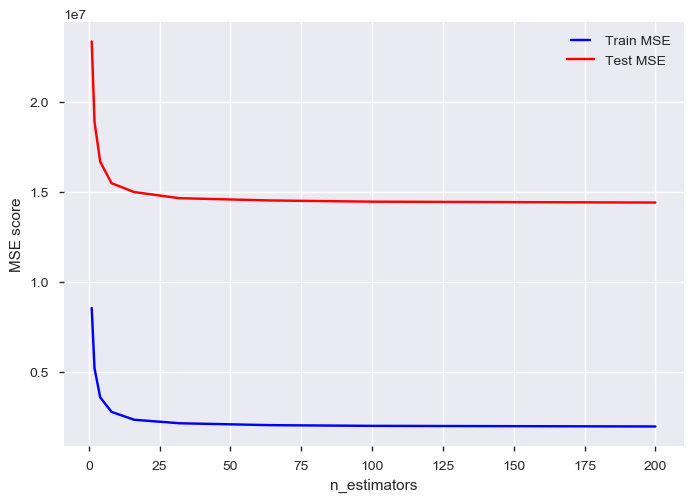

In [125]:
#Tunning RandomForest

#N_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    mse = mean_squared_error(y_train, train_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(mse)
    
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train MSE")
line2, = plt.plot(n_estimators, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('n_estimators')
plt.show()




In [126]:
train_results

[8550007.54966492,
 5200125.292734197,
 3592779.070980099,
 2784975.5525501487,
 2349864.1049025175,
 2154721.265805973,
 2049336.2852824754,
 2010337.322856705,
 1976440.4413446533]

In [127]:
test_results

[23345172.774266545,
 18875906.855335757,
 16672553.084713576,
 15479900.249048924,
 14986244.90434923,
 14646176.30535312,
 14521164.275378354,
 14453620.24168663,
 14404221.538882872]

In [128]:
n_estimators

[1, 2, 4, 8, 16, 32, 64, 100, 200]

In [ ]:
#running and saving RandomForest with n_estimators = 32

rf = RandomForestRegressor(n_estimators=32, n_jobs=-1)

rf.fit(X_train, y_train)

filename = '1.modelo_rf_n_estimator_32.sav'

pickle.dump(rf, open(filename, 'wb'))

In [ ]:
#Tunning max depth

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestRegressor(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    mse = mean_squared_error(y_train, train_pred)
    train_results.append(mse)
    
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train MSE")
line2, = plt.plot(n_estimators, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('max_depth')
plt.show()


### Submission example

In [60]:
import numpy as np

In [61]:
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(data_test.shape[0]) * 75000 + 5000, index=data_test.index, columns=['Price'])

In [62]:
y_pred.to_csv('test_submission.csv', index_label='ID')

In [63]:
y_pred.head()

Price
ID              
0   33090.508914
1   76303.572981
2   59899.545636
3   49899.386315
4   16701.398033

# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
